In [4]:
"""# CNN-1D-15分法-訓練-tensorflow2.0"""

import tensorflow as tf
import numpy as np


def loading_data():
  signal_data = np.load('15_class_signal_train_256_1D_for_all_data_high_8_2.npy')
  symbol_data = np.load('15_class_symbol_train_256_for_all_data_high_8_2.npy')
  signal_test = np.load('15_class_signal_test_256_1D_for_all_data_high_8_2.npy')
  symbol_test = np.load('15_class_symbol_test_256_for_all_data_high_8_2.npy')

  return signal_data, symbol_data, signal_test, symbol_test

def random_process_data(imgs, labels):
  # 打散數據集
  indices = np.random.permutation(imgs.shape[0])
  imgs = imgs[indices]  
  labels = labels[indices]

  return imgs, labels

def build_model():
  model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(4, 21, strides= 1,padding='same', activation= 'relu'),
  tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same'),
  tf.keras.layers.Conv1D(16, 23, strides=1, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same'),
  tf.keras.layers.Conv1D(32, 25, strides=1, padding='same', activation='relu'),
  tf.keras.layers.AveragePooling1D(pool_size=3, strides=2, padding='same'),
  tf.keras.layers.Conv1D(64, 27, strides=1, padding= 'same', activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=3, strides=2, padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(15, activation='softmax')
  ])
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
  # model.summary() # 秀出模型架構
  return model

def label_to_number(label):
  for i in range(len(label)):
    if label[i] == 'N':
      label[i] = 0
    elif label[i] == 'e':
      label[i] = 1
    elif label[i] == 'j':
      label[i] = 2
    elif label[i] == 'L':
      label[i] = 3
    elif label[i] == 'R':
      label[i] = 4
    elif label[i] == 'A':
      label[i] = 5
    elif label[i] == 'a':
      label[i] = 6
    elif label[i] == 'J':
      label[i] = 7
    elif label[i] == 'S':
      label[i] = 8
    elif label[i] == 'V':
      label[i] = 9
    elif label[i] == 'E':
      label[i] = 10
    elif label[i] == 'F':
      label[i] = 11
    elif label[i] == '/':
      label[i] = 12
    elif label[i] == 'f':
      label[i] = 13
    elif label[i] == 'Q':
      label[i] = 14
    # else:
    #   print(label[i])
  label = label.astype(int)
  return label


signal_data, symbol_data, signal_test, symbol_test = loading_data()

signal_data, symbol_data = random_process_data(signal_data, symbol_data)

signal_data = signal_data.reshape(signal_data.shape[0], signal_data.shape[1], 1) #重新組成->(trainX資料長度,step=300or500,hdden=1)
signal_test = signal_test.reshape(signal_test.shape[0], signal_test.shape[1], 1)

symbol_data = label_to_number(symbol_data)
symbol_test = label_to_number(symbol_test)

save_file_path = './final_1d.h5'
model = build_model()
# model = tf.keras.models.load_model(save_file_path)

#若驗證準確率筆上次訓練來得高>>>>存檔
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

# model.build(signal_data.shape) 
model.summary()
history = model.fit(signal_data, symbol_data, epochs=50, batch_size=128, validation_split=0.3, callbacks=callbacks_list)
model.save(save_file_path)
print("model已儲存")

test_loss, test_acc = model.evaluate(signal_test, symbol_test, verbose=2)
print("Test_loss: ", test_loss)
print("Test_acc: ", test_acc)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ ?                      │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.8419 - loss: 0.6730
Epoch 1: val_acc improved from None to 0.97094, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - acc: 0.9136 - loss: 0.3661 - val_acc: 0.9709 - val_loss: 0.1452
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9677 - loss: 0.1425
Epoch 2: val_acc improved from 0.97094 to 0.97629, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - acc: 0.9701 - loss: 0.1300 - val_acc: 0.9763 - val_loss: 0.0958
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.9760 - loss: 0.0982
Epoch 3: val_acc improved from 0.97629 to 0.98151, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - acc: 0.9767 - loss: 0.0950 - val_acc: 0.9815 - val_loss: 0.0740
Epoch 4/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9799 - loss: 0.0805
Epoch 4: val_acc improved from 0.98151 to 0.98365, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - acc: 0.9811 - loss: 0.0765 - val_acc: 0.9836 - val_loss: 0.0651
Epoch 5/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.9835 - loss: 0.0682
Epoch 5: val_acc improved from 0.98365 to 0.98506, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - acc: 0.9833 - loss: 0.0659 - val_acc: 0.9851 - val_loss: 0.0638
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9849 - loss: 0.0567
Epoch 6: val_acc did not improve from 0.98506
426/426 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - acc: 0.9852 - loss: 0.0562 - val_acc: 0.9849 - val_loss: 0.0637
Epoch 7/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9856 - loss: 0.0521
Epoch 7: val_acc improved from 0.98506 to 0.98746, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - acc: 0.9863 - loss: 0.0505 - val_acc: 0.9875 - val_loss: 0.0601
Epoch 8/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9875 - loss: 0.0445
Epoch 8: val_acc did not improve from 0.98746
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - acc: 0.9874 - loss: 0.0448 - val_acc: 0.9867 - val_loss: 0.0593
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9887 - loss: 0.0410
Epoch 9: val_acc improved from 0.98746 to 0.98857, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - acc: 0.9888 - loss: 0.0406 - val_acc: 0.9886 - val_loss: 0.0526
Epoch 10/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.9895 - loss: 0.0359
Epoch 10: val_acc improved from 0.98857 to 0.98866, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - acc: 0.9885 - loss: 0.0396 - val_acc: 0.9887 - val_loss: 0.0516
Epoch 11/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.9909 - loss: 0.0340
Epoch 11: val_acc improved from 0.98866 to 0.98887, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - acc: 0.9900 - loss: 0.0347 - val_acc: 0.9889 - val_loss: 0.0556
Epoch 12/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.9904 - loss: 0.0315
Epoch 12: val_acc improved from 0.98887 to 0.98981, saving model to ./final_1d.h5


426/426 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - acc: 0.9907 - loss: 0.0315 - val_acc: 0.9898 - val_loss: 0.0501
Epoch 13/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9904 - loss: 0.0318
Epoch 13: val_acc did not improve from 0.98981
426/426 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - acc: 0.9909 - loss: 0.0304 - val_acc: 0.9883 - val_loss: 0.0626
Epoch 14/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.9899 - loss: 0.0325
Epoch 14: val_acc did not improve from 0.98981
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - acc: 0.9902 - loss: 0.0318 - val_acc: 0.9888 - val_loss: 0.0557
Epoch 15/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.9912 - loss: 0.0280
Epoch 15: val_acc did not improve from 0.98981
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - acc: 0.9915 - loss: 0.0277 - val_acc: 0.9889 - val_loss: 0.0685
Epoch 16/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.9919 - loss: 0.0266
Epoch 16: val_acc did not improve from 0.98981
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step -

426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - acc: 0.9931 - loss: 0.0213 - val_acc: 0.9904 - val_loss: 0.0697
Epoch 19/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9935 - loss: 0.0189
Epoch 19: val_acc did not improve from 0.99037
426/426 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - acc: 0.9928 - loss: 0.0219 - val_acc: 0.9899 - val_loss: 0.0564
Epoch 20/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.9934 - loss: 0.0193
Epoch 20: val_acc did not improve from 0.99037
426/426 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - acc: 0.9933 - loss: 0.0208 - val_acc: 0.9869 - val_loss: 0.0840
Epoch 21/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.9920 - loss: 0.0246
Epoch 21: val_acc did not improve from 0.99037
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - acc: 0.9932 - loss: 0.0208 - val_acc: 0.9899 - val_loss: 0.0650
Epoch 22/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9941 - loss: 0.0178
Epoch 22: val_acc did not improve from 0.99037
426/426 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step -

426/426 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - acc: 0.9962 - loss: 0.0119 - val_acc: 0.9908 - val_loss: 0.0746
Epoch 45/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9975 - loss: 0.0071
Epoch 45: val_acc did not improve from 0.99084
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - acc: 0.9976 - loss: 0.0071 - val_acc: 0.9882 - val_loss: 0.0901
Epoch 46/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9962 - loss: 0.0111
Epoch 46: val_acc did not improve from 0.99084
426/426 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - acc: 0.9958 - loss: 0.0134 - val_acc: 0.9884 - val_loss: 0.0904
Epoch 47/50
425/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9960 - loss: 0.0125
Epoch 47: val_acc did not improve from 0.99084
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - acc: 0.9962 - loss: 0.0117 - val_acc: 0.9897 - val_loss: 0.0898
Epoch 48/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.9970 - loss: 0.0084
Epoch 48: val_acc did not improve from 0.99084
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step -

model已儲存
609/609 - 3s - 5ms/step - acc: 0.9878 - loss: 0.0913
Test_loss:  0.0912746861577034
Test_acc:  0.9878261685371399


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

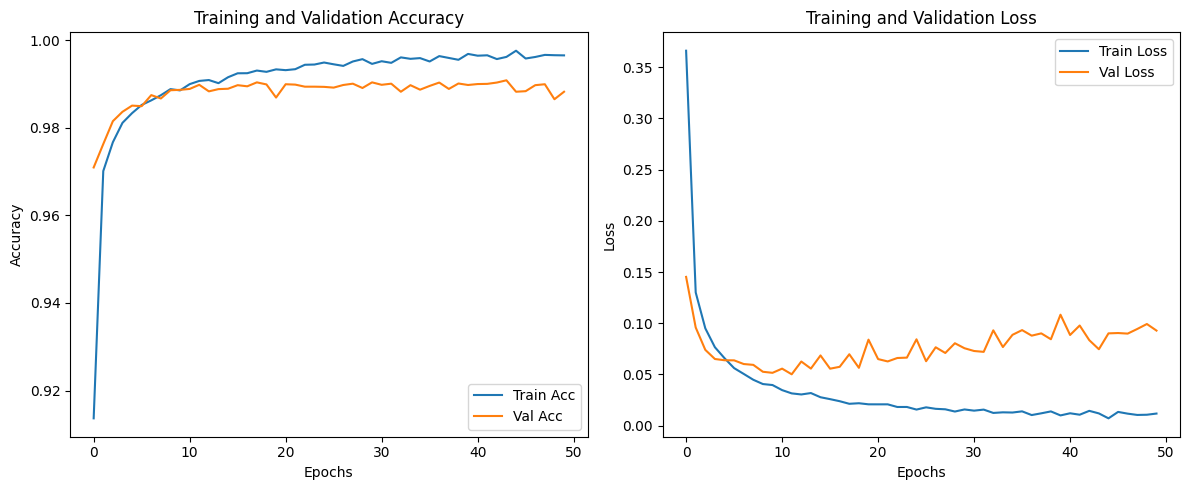

609/609 - 3s - 6ms/step - acc: 0.9878 - loss: 0.0913
Test_loss:  0.0912746861577034
Test_acc:  0.9878261685371399
609/609 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


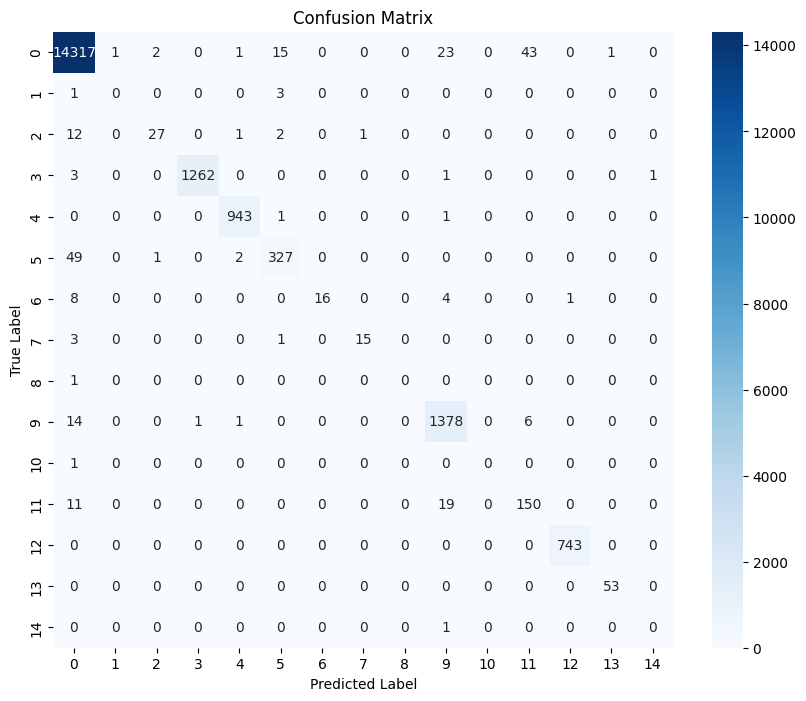

In [6]:
# ---- Plot Accuracy and Loss ----
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ---- Evaluate and Confusion Matrix ----
test_loss, test_acc = model.evaluate(signal_test, symbol_test, verbose=2)
print("Test_loss: ", test_loss)
print("Test_acc: ", test_acc)

# Predictions
y_pred = model.predict(signal_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(symbol_test, y_pred_classes)
labels = [str(i) for i in range(15)]  # class labels 0–14

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()